In [134]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print(torch.__version__)

1.0.0


In [142]:
from sklearn.datasets import load_digits

mnist = load_digits(2)

X,y = mnist.data, mnist.target
y = np.array(y, dtype='long')

print("y [shape - %s]:" % (str(y.shape)), y[:10])
print("X [shape - %s]:" % (str(X.shape)))

<class 'numpy.int64'>
y [shape - (360,)]: [0 1 0 1 0 1 0 0 1 1]
X [shape - (360, 64)]:


In [53]:
a = np.arange(10)
t0=torch.tensor(a, dtype=torch.float, requires_grad=True)
t1 = t0**2
l=torch.tensor(a, dtype=torch.float, requires_grad=True)
t1.backward(l)

print(t0.grad)

tensor([  0.,   2.,   8.,  18.,  32.,  50.,  72.,  98., 128., 162.])


tensor([2.7000e+01, 2.4841e+01, 2.2772e+01, 2.0793e+01, 1.8903e+01, 1.7104e+01,
        1.5395e+01, 1.3776e+01, 1.2246e+01, 1.0807e+01, 9.4573e+00, 8.1978e+00,
        7.0283e+00, 5.9488e+00, 4.9592e+00, 4.0596e+00, 3.2499e+00, 2.5302e+00,
        1.9005e+00, 1.3607e+00, 9.1087e-01, 5.5102e-01, 2.8113e-01, 1.0121e-01,
        1.1245e-02, 1.1245e-02, 1.0121e-01, 2.8113e-01, 5.5102e-01, 9.1087e-01,
        1.3607e+00, 1.9005e+00, 2.5302e+00, 3.2499e+00, 4.0596e+00, 4.9592e+00,
        5.9488e+00, 7.0283e+00, 8.1978e+00, 9.4573e+00, 1.0807e+01, 1.2246e+01,
        1.3776e+01, 1.5395e+01, 1.7104e+01, 1.8903e+01, 2.0793e+01, 2.2772e+01,
        2.4841e+01, 2.7000e+01]) None


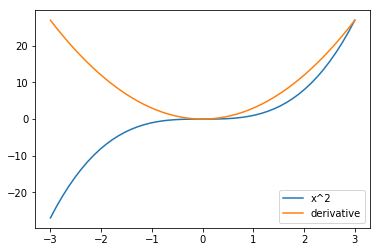

In [120]:
input_data = np.linspace(-3,3,dtype='float32')

# input_data = np.arange(10,dtype='float32')

grad_v = torch.ones(len(input_data),requires_grad=True)

# x = torch.ones(len(input_data),requires_grad=True)
x = Variable(torch.from_numpy(input_data), requires_grad=True)

func = x**3

func.backward(torch.Tensor(grad_v))
grad = x.grad

print(grad.data, func.grad)

plt.plot(input_data, func.data.numpy(),label="x^2")
plt.plot(input_data, grad.data.numpy(), label="derivative")
plt.legend();

In [155]:

class LogisticRegr(nn.Module):
    def __init__(self, n_in, n_out):
        super(LogisticRegr, self).__init__()
        self.lin = nn.Linear(n_in, n_out)
        
    def forward(self, x):
        return torch.sigmoid(self.lin(x))
        

        
lr = LogisticRegr(64,2)

input_tensor = torch.Tensor(X)

lr.forward(input_tensor).shape

torch.Size([360, 2])

In [156]:
model = LogisticRegr(64,2)

loss_function = nn.CrossEntropyLoss() 

optimizer = optim.SGD(model.parameters(), lr=0.1)


In [157]:
log_probs.data

tensor([[0.4212],
        [0.9699],
        [0.1995],
        [0.9914],
        [0.5830],
        [0.9869],
        [0.2249],
        [0.4227],
        [0.9904],
        [0.9978],
        [0.0457],
        [0.3850],
        [0.6025],
        [0.9892],
        [0.9968],
        [0.3206],
        [0.0183],
        [0.1512],
        [0.9822],
        [0.9787],
        [0.9783],
        [0.9446],
        [0.3883],
        [0.0698],
        [0.9775],
        [0.2380],
        [0.2329],
        [0.9586],
        [0.5353],
        [0.9655],
        [0.1602],
        [0.8379],
        [0.3729],
        [0.5154],
        [0.9911],
        [0.9143],
        [0.0599],
        [0.7336],
        [0.3231],
        [0.9965],
        [0.9726],
        [0.1254],
        [0.5730],
        [0.1089],
        [0.9797],
        [0.9522],
        [0.7768],
        [0.9785],
        [0.9816],
        [0.2105],
        [0.9810],
        [0.2228],
        [0.3142],
        [0.6323],
        [0.4025],
        [0

In [162]:

x_tensor = torch.Tensor(X)
y_tensor = torch.LongTensor(y)

log_probs = model(x_tensor)
loss = loss_function(log_probs, y_tensor)
loss.backward()

In [172]:

model = LogisticRegr(64,2)
loss_function = nn.CrossEntropyLoss() 
optimizer = optim.SGD(model.parameters(), lr=0.1)

x_tensor = torch.Tensor(X)
y_tensor = torch.LongTensor(y)

num_epoch = 100

for _ in range(num_epoch):
    model.zero_grad()
    log_probs = model(x_tensor)
    loss = loss_function(log_probs, y_tensor)
    loss.backward()
    optimizer.step()
    
output = torch.argmax(model(x_tensor).data, dim=1).numpy()
print(y==output)
    


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [175]:
import mnist 

# #[down]loading the original MNIST dataset.
# #Please note that you should only train your NN on _train sample,
# # _val can be used to evaluate out-of-sample error, compare models or perform early-stopping
# # _test should be hidden under a rock untill final evaluation... But we both know it is near impossible to catch you evaluating on it.
# X_train,y_train,X_val,y_val,X_test,y_test = load_dataset()

# print (X_train.shape,y_train.shape)

In [181]:
train_imgs = mnist.train_images()

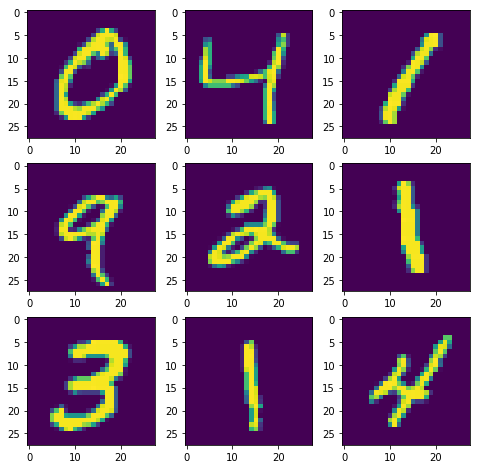

In [202]:

fig = plt.figure(figsize=(8,8))

for i in range(1,10):
    fig.add_subplot(3,3,i)
    plt.imshow(train_imgs[i])

plt.show()


In [ ]:


class SimpleNet(nn.Module):
    def __init__(self, in_size, h_size, out_size):
        super(LogisticRegr, self).__init__()
        self.lin1 = nn.Linear(in_size, h_size)
        self.lin2 = nn.Linear(h_size, out_size)
        
    def forward(self, x):
        out = F.relu(self.lin1(x))
        out = F.relu(self.lin2(x))
        return out

